In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df = data.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
df = df[df.gender != "Other"]

In [13]:
df = df.drop(columns =['id'])

In [14]:
df = pd.get_dummies(df, columns=['gender'],drop_first=True)

In [15]:
df = pd.get_dummies(df, columns=['ever_married'],drop_first=True)

In [16]:
df = pd.get_dummies(df, columns=['Residence_type'],drop_first=True)

In [17]:
df = pd.get_dummies(df, columns=['work_type'])

In [18]:
df = pd.get_dummies(df, columns=['smoking_status'])

In [19]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,0,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,0,0,1,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,0,0,1,0,0,0,1,0,0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



C:\Users\murti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(confusion_matrix(y_test, y_predict))

[[1401    0]
 [  72    0]]


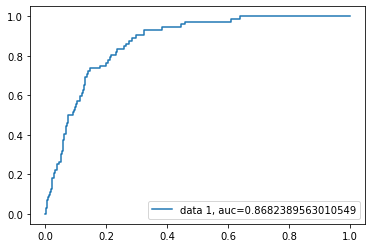

In [20]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
y_test.value_counts()

0    1401
1      72
Name: stroke, dtype: int64

In [22]:
y_train.value_counts()

0    3298
1     137
Name: stroke, dtype: int64

In [118]:
from catboost import CatBoostClassifier

In [119]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.017449
0:	learn: 0.6657317	total: 222ms	remaining: 3m 41s
1:	learn: 0.6391119	total: 228ms	remaining: 1m 54s
2:	learn: 0.6156792	total: 232ms	remaining: 1m 17s
3:	learn: 0.5934863	total: 238ms	remaining: 59.1s
4:	learn: 0.5681897	total: 241ms	remaining: 48s
5:	learn: 0.5437052	total: 245ms	remaining: 40.6s
6:	learn: 0.5220034	total: 249ms	remaining: 35.3s
7:	learn: 0.5041589	total: 253ms	remaining: 31.3s
8:	learn: 0.4839038	total: 257ms	remaining: 28.3s
9:	learn: 0.4662966	total: 260ms	remaining: 25.8s
10:	learn: 0.4468464	total: 264ms	remaining: 23.8s
11:	learn: 0.4325107	total: 268ms	remaining: 22.1s
12:	learn: 0.4156988	total: 272ms	remaining: 20.7s
13:	learn: 0.3996177	total: 277ms	remaining: 19.5s
14:	learn: 0.3876556	total: 281ms	remaining: 18.5s
15:	learn: 0.3746345	total: 285ms	remaining: 17.5s
16:	learn: 0.3623389	total: 288ms	remaining: 16.7s
17:	learn: 0.3500971	total: 292ms	remaining: 15.9s
18:	learn: 0.3401072	total: 295ms	remaining: 15.2s
19:	learn:

183:	learn: 0.1157311	total: 1.06s	remaining: 4.69s
184:	learn: 0.1155870	total: 1.06s	remaining: 4.68s
185:	learn: 0.1153787	total: 1.07s	remaining: 4.68s
186:	learn: 0.1152325	total: 1.07s	remaining: 4.67s
187:	learn: 0.1150956	total: 1.08s	remaining: 4.66s
188:	learn: 0.1148920	total: 1.08s	remaining: 4.65s
189:	learn: 0.1147226	total: 1.09s	remaining: 4.64s
190:	learn: 0.1145996	total: 1.09s	remaining: 4.63s
191:	learn: 0.1144696	total: 1.1s	remaining: 4.62s
192:	learn: 0.1143927	total: 1.1s	remaining: 4.61s
193:	learn: 0.1142722	total: 1.1s	remaining: 4.59s
194:	learn: 0.1141010	total: 1.11s	remaining: 4.59s
195:	learn: 0.1139171	total: 1.11s	remaining: 4.58s
196:	learn: 0.1138118	total: 1.12s	remaining: 4.57s
197:	learn: 0.1137091	total: 1.13s	remaining: 4.56s
198:	learn: 0.1135748	total: 1.14s	remaining: 4.58s
199:	learn: 0.1134449	total: 1.15s	remaining: 4.58s
200:	learn: 0.1132528	total: 1.16s	remaining: 4.61s
201:	learn: 0.1130495	total: 1.16s	remaining: 4.6s
202:	learn: 0.11

357:	learn: 0.0953856	total: 2.1s	remaining: 3.77s
358:	learn: 0.0952909	total: 2.12s	remaining: 3.78s
359:	learn: 0.0951860	total: 2.12s	remaining: 3.78s
360:	learn: 0.0950859	total: 2.15s	remaining: 3.81s
361:	learn: 0.0950328	total: 2.16s	remaining: 3.8s
362:	learn: 0.0949374	total: 2.16s	remaining: 3.8s
363:	learn: 0.0948298	total: 2.17s	remaining: 3.79s
364:	learn: 0.0947572	total: 2.18s	remaining: 3.79s
365:	learn: 0.0946886	total: 2.2s	remaining: 3.82s
366:	learn: 0.0945874	total: 2.21s	remaining: 3.81s
367:	learn: 0.0945201	total: 2.23s	remaining: 3.83s
368:	learn: 0.0944606	total: 2.24s	remaining: 3.83s
369:	learn: 0.0943808	total: 2.25s	remaining: 3.83s
370:	learn: 0.0943193	total: 2.25s	remaining: 3.82s
371:	learn: 0.0941877	total: 2.26s	remaining: 3.81s
372:	learn: 0.0940506	total: 2.27s	remaining: 3.81s
373:	learn: 0.0939417	total: 2.27s	remaining: 3.8s
374:	learn: 0.0938329	total: 2.27s	remaining: 3.79s
375:	learn: 0.0936978	total: 2.28s	remaining: 3.79s
376:	learn: 0.093

537:	learn: 0.0801097	total: 3.24s	remaining: 2.78s
538:	learn: 0.0800395	total: 3.25s	remaining: 2.78s
539:	learn: 0.0799426	total: 3.26s	remaining: 2.77s
540:	learn: 0.0798522	total: 3.26s	remaining: 2.77s
541:	learn: 0.0797823	total: 3.27s	remaining: 2.76s
542:	learn: 0.0797098	total: 3.27s	remaining: 2.75s
543:	learn: 0.0796290	total: 3.28s	remaining: 2.75s
544:	learn: 0.0795902	total: 3.29s	remaining: 2.74s
545:	learn: 0.0795144	total: 3.29s	remaining: 2.74s
546:	learn: 0.0794242	total: 3.3s	remaining: 2.73s
547:	learn: 0.0792969	total: 3.3s	remaining: 2.72s
548:	learn: 0.0792691	total: 3.31s	remaining: 2.72s
549:	learn: 0.0792244	total: 3.31s	remaining: 2.71s
550:	learn: 0.0791546	total: 3.32s	remaining: 2.71s
551:	learn: 0.0790541	total: 3.33s	remaining: 2.7s
552:	learn: 0.0789822	total: 3.33s	remaining: 2.69s
553:	learn: 0.0789462	total: 3.33s	remaining: 2.68s
554:	learn: 0.0788727	total: 3.34s	remaining: 2.68s
555:	learn: 0.0787887	total: 3.34s	remaining: 2.67s
556:	learn: 0.0

716:	learn: 0.0683875	total: 4.08s	remaining: 1.61s
717:	learn: 0.0683321	total: 4.08s	remaining: 1.6s
718:	learn: 0.0682701	total: 4.08s	remaining: 1.59s
719:	learn: 0.0681933	total: 4.09s	remaining: 1.59s
720:	learn: 0.0681305	total: 4.09s	remaining: 1.58s
721:	learn: 0.0680563	total: 4.09s	remaining: 1.58s
722:	learn: 0.0680305	total: 4.1s	remaining: 1.57s
723:	learn: 0.0680029	total: 4.1s	remaining: 1.56s
724:	learn: 0.0679462	total: 4.11s	remaining: 1.56s
725:	learn: 0.0679306	total: 4.11s	remaining: 1.55s
726:	learn: 0.0678476	total: 4.12s	remaining: 1.54s
727:	learn: 0.0677900	total: 4.12s	remaining: 1.54s
728:	learn: 0.0677516	total: 4.13s	remaining: 1.53s
729:	learn: 0.0677459	total: 4.14s	remaining: 1.53s
730:	learn: 0.0677157	total: 4.14s	remaining: 1.52s
731:	learn: 0.0676393	total: 4.15s	remaining: 1.52s
732:	learn: 0.0675792	total: 4.15s	remaining: 1.51s
733:	learn: 0.0675286	total: 4.16s	remaining: 1.51s
734:	learn: 0.0674489	total: 4.16s	remaining: 1.5s
735:	learn: 0.06

890:	learn: 0.0601192	total: 4.91s	remaining: 601ms
891:	learn: 0.0600719	total: 4.91s	remaining: 595ms
892:	learn: 0.0600154	total: 4.92s	remaining: 589ms
893:	learn: 0.0599149	total: 4.92s	remaining: 584ms
894:	learn: 0.0598444	total: 4.93s	remaining: 578ms
895:	learn: 0.0597922	total: 4.93s	remaining: 572ms
896:	learn: 0.0597302	total: 4.93s	remaining: 567ms
897:	learn: 0.0597101	total: 4.94s	remaining: 561ms
898:	learn: 0.0597009	total: 4.94s	remaining: 555ms
899:	learn: 0.0596844	total: 4.95s	remaining: 550ms
900:	learn: 0.0596092	total: 4.95s	remaining: 544ms
901:	learn: 0.0595352	total: 4.96s	remaining: 538ms
902:	learn: 0.0594928	total: 4.96s	remaining: 533ms
903:	learn: 0.0594761	total: 4.96s	remaining: 527ms
904:	learn: 0.0594073	total: 4.97s	remaining: 521ms
905:	learn: 0.0593566	total: 4.97s	remaining: 516ms
906:	learn: 0.0593303	total: 4.97s	remaining: 510ms
907:	learn: 0.0593111	total: 4.98s	remaining: 504ms
908:	learn: 0.0592813	total: 4.98s	remaining: 499ms
909:	learn: 

In [120]:
y_predict = model.predict(X_test)

In [121]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.50      0.01      0.03        72

    accuracy                           0.95      1473
   macro avg       0.73      0.51      0.50      1473
weighted avg       0.93      0.95      0.93      1473



In [122]:
print(confusion_matrix(y_test, y_predict))

[[1400    1]
 [  71    1]]


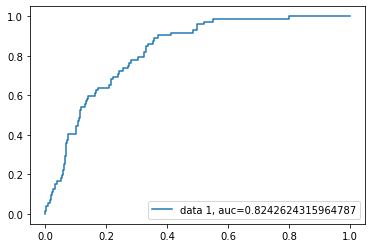

In [129]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1401
           1       0.18      0.12      0.15        72

    accuracy                           0.93      1473
   macro avg       0.57      0.55      0.56      1473
weighted avg       0.92      0.93      0.92      1473

[[1361   40]
 [  63    9]]


In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473

[[1399    2]
 [  72    0]]


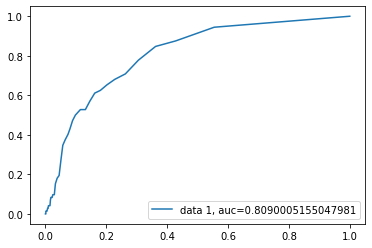

In [130]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.10+8-LTS-162, mixed mode)
  Starting server from C:\Users\murti\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\murti\AppData\Local\Temp\tmpqw9ljxqg
  JVM stdout: C:\Users\murti\AppData\Local\Temp\tmpqw9ljxqg\h2o_murti_started_from_python.out
  JVM stderr: C:\Users\murti\AppData\Local\Temp\tmpqw9ljxqg\h2o_murti_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.5
H2O_cluster_version_age:,22 hours and 35 minutes
H2O_cluster_name:,H2O_from_python_murti_glp8kg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [23]:
df_hex = h2o.H2OFrame(df)

df_hex['stroke'] = df_hex['stroke'].asfactor()

# train / test split (70/30)
train_hex, test_hex = df_hex.split_frame(ratios=[0.7], seed=999)

# pandas versions of train/test
df_train = train_hex.as_data_frame()
df_test = test_hex.as_data_frame()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')

In [25]:
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

In [26]:
fit_1 = H2OGradientBoostingEstimator(ntrees = 100,
                                     max_depth=4,
                                     min_rows=10,
                                     learn_rate=0.01, # default: 0.1
                                     sample_rate=1,
                                     col_sample_rate=0.7,
                                     nfolds=5,
                                     score_each_iteration=True,
                                     stopping_metric='auto',
                                     stopping_rounds=10,
                                     seed=999)

In [32]:
predictors = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'Residence_type_Urban',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [33]:
fit_1.train(x=predictors,y='stroke',training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


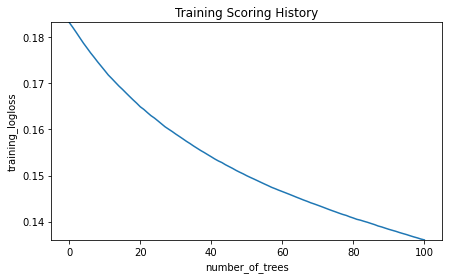

In [34]:
plt.rcParams['figure.figsize']=(7,4)
fit_1.plot()

In [35]:
fit_1.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.88303715,0.061864384,0.8585434,0.7893297,0.8933333,0.9368723,0.9371069
1,auc,0.841131,0.025762754,0.83385265,0.83657634,0.8071845,0.8778214,0.85022
2,aucpr,0.17604493,0.045706008,0.14954679,0.14413312,0.13694827,0.21150681,0.23808965
3,err,0.116962865,0.061864384,0.14145659,0.2106703,0.10666667,0.06312769,0.062893085
4,err_count,82.2,47.04466,101.0,154.0,72.0,44.0,40.0
5,f0point5,0.25417015,0.08562657,0.19144145,0.18569463,0.1980198,0.34759358,0.34810126
6,f1,0.2975469,0.0602669,0.25185186,0.2596154,0.25,0.37142858,0.3548387
7,f2,0.3797747,0.035853207,0.36796537,0.4313099,0.33898306,0.398773,0.3618421
8,lift_top_group,6.690418,1.5336452,5.578125,5.2214284,7.142857,6.423963,9.085714
9,logloss,0.15495156,0.007423866,0.1563655,0.16582537,0.14688642,0.14921708,0.15646344



See the whole table with table.as_data_frame()


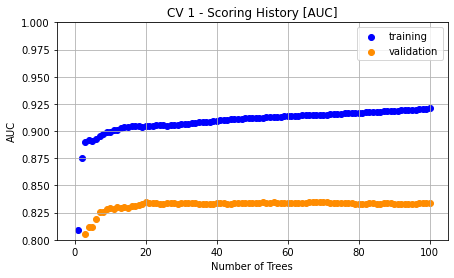

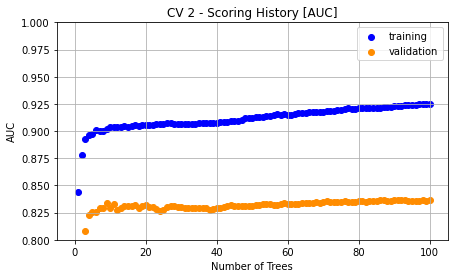

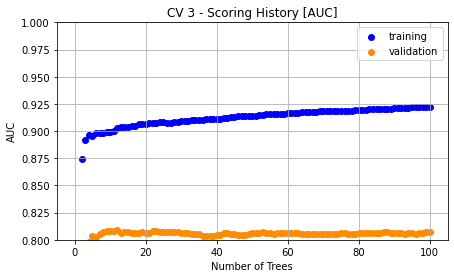

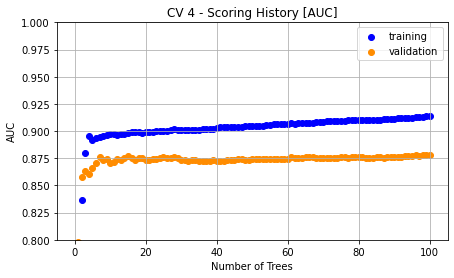

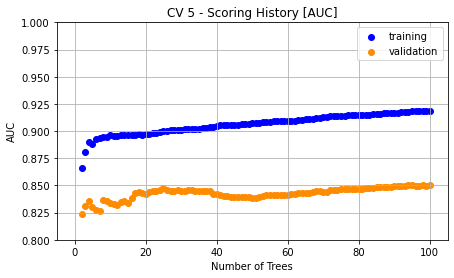

In [36]:
for i in range(5):
    cv_model_temp = fit_1.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [AUC]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_auc, 
                c='blue', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_auc, 
                c='darkorange', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.ylabel('AUC')
    plt.ylim(0.8,1)
    plt.legend()
    plt.grid()
    plt.show()

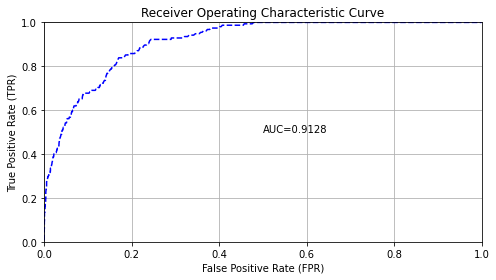

In [37]:
perf_train = fit_1.model_performance(train=True)
perf_train.plot()

In [38]:
conf_train = fit_1.confusion_matrix(train=True)
conf_train.show()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15319028698221965: 


,,0,1,Error,Rate
0,0,3225.0,73.0,0.0221,(73.0/3298.0)
1,1,93.0,62.0,0.6,(93.0/155.0)
2,Total,3318.0,135.0,0.0481,(166.0/3453.0)


In [39]:
conf_list_temp = conf_train.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1])
acc_t0 = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t0,6))

Accuracy: 0.951926


In [40]:
tt = 0.148
conf_train_man = fit_1.confusion_matrix(train=True, thresholds=tt)
conf_train_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.14843548487403022.

Confusion Matrix (Act/Pred) @ threshold = 0.14843548487403022: 


,,0,1,Error,Rate
0,0,3212.0,86.0,0.0261,(86.0/3298.0)
1,1,92.0,63.0,0.5935,(92.0/155.0)
2,Total,3304.0,149.0,0.0515,(178.0/3453.0)


In [41]:
conf_list_temp = conf_train_man.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1]) 
acc_t1 = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t1,6))

Accuracy: 0.948451


In [42]:
conf_cv_man = fit_1.confusion_matrix(xval=True, thresholds=tt)
conf_cv_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.14785430351717554.

Confusion Matrix (Act/Pred) @ threshold = 0.14785430351717554: 


,,0,1,Error,Rate
0,0,3196.0,102.0,0.0309,(102.0/3298.0)
1,1,129.0,26.0,0.8323,(129.0/155.0)
2,Total,3325.0,128.0,0.0669,(231.0/3453.0)


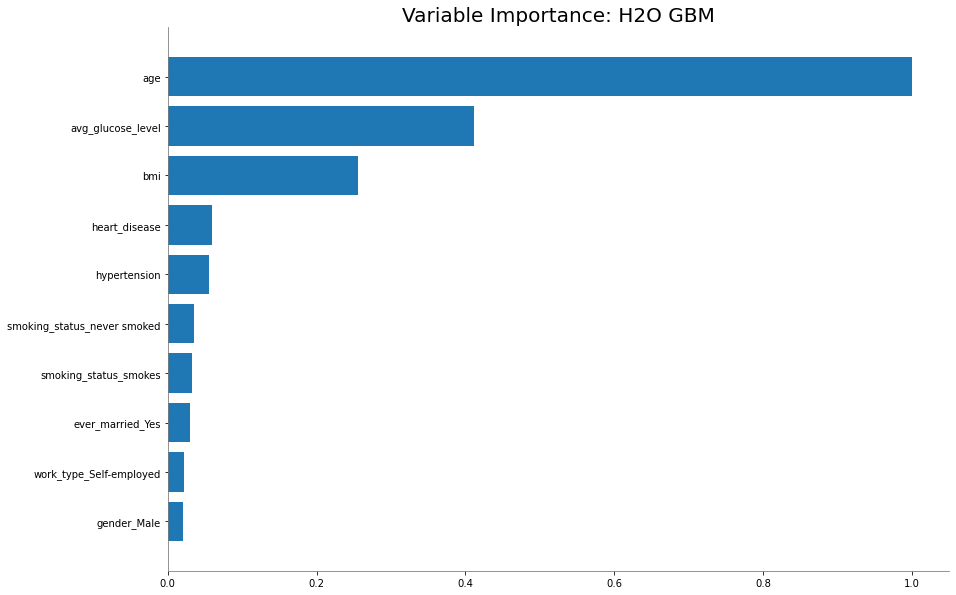

In [43]:
fit_1.varimp_plot()

Elapsed time [s]:  1.65


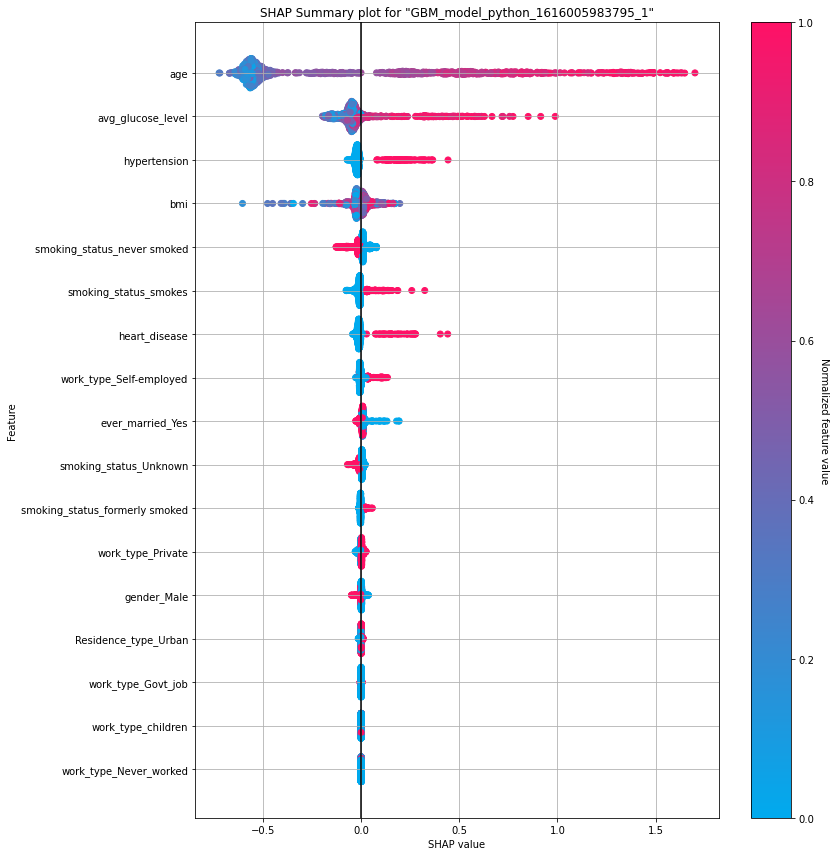

In [45]:
import time
t1 = time.time()
fit_1.shap_summary_plot(train_hex);
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

gbm prediction progress: |████████████████████████████████████████████████| 100%


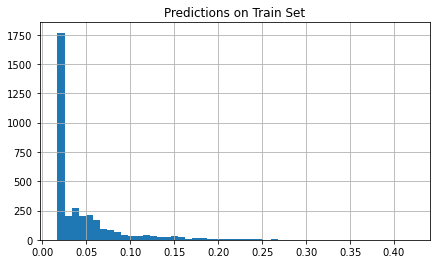

In [46]:
pred_train = fit_1.predict(train_hex)['p1']
pred_train = pred_train.as_data_frame().p1

# and plot
plt.hist(pred_train, bins=50)
plt.title('Predictions on Train Set')
plt.grid()
plt.show()

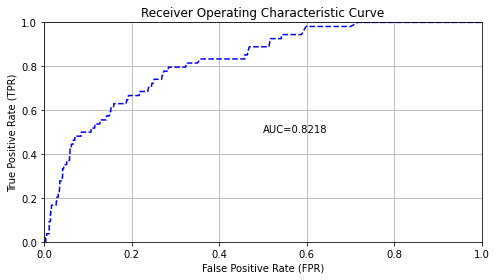

In [47]:
perf_test = fit_1.model_performance(test_hex)

# ROC Curve - Test Set
perf_test.plot()

In [48]:
conf_test_man = perf_test.confusion_matrix(thresholds=tt)
conf_test_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.14614748206855194.

Confusion Matrix (Act/Pred) @ threshold = 0.14614748206855194: 


,,0,1,Error,Rate
0,0,1353.0,48.0,0.0343,(48.0/1401.0)
1,1,42.0,12.0,0.7778,(42.0/54.0)
2,Total,1395.0,60.0,0.0619,(90.0/1455.0)


In [49]:
conf_list_temp = conf_test_man.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1]) 
acc_t1_test = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t1_test,6))

Accuracy: 0.938144


gbm prediction progress: |████████████████████████████████████████████████| 100%


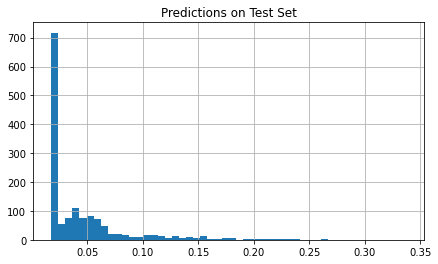

In [50]:
pred_test = fit_1.predict(test_hex)['p1']
pred_test = pred_test.as_data_frame().p1

# and plot
plt.hist(pred_test, bins=50)
plt.title('Predictions on Test Set')
plt.grid()
plt.show()